## <left>For Heart Disease dataset:</left>

1. download the dataset (train and test files)
2. load and concatenate those datasets via pandas
3. print the dataset size and first rows from the dataset
4. print the lists of numeric, categorical and boolean columns
5. analyze values distribution for each numerical column
6. analyze frequency distribution of values for each categorical and boolean columns
7. analyze correlation between columns
8. perform preprocessing if needed (standardization, encodings etc)
9. generate automatic report for the dataset via pandas_profiling library

In [1]:
import math
import warnings
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline
from matplotlib import pyplot as plt
from pathlib import Path
from scipy import stats
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option("display.precision", 2)
sns.set(style="whitegrid", color_codes=True)

In [2]:
_format = '%(message)s'
logging.basicConfig(level=logging.INFO, format=_format)
logger = logging.getLogger(__name__)

In [3]:
data_path = Path('data')
train_data = 'heart_train.csv'
test_data = 'heart_test.csv'
stat_html = 'heart_stat.html'

In [4]:
df_train = pd.read_csv(data_path.joinpath(train_data))
df_test = pd.read_csv(data_path.joinpath(test_data))

In [5]:
df_train.shape

(242, 14)

In [6]:
df_test.shape

(61, 14)

In [7]:
frames = [df_train, df_test]
df = pd.concat(frames)._get_numeric_data()
df_len = df.shape
df_len

(303, 14)

In [8]:
df.size

4242

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 60
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


In [10]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
1,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
2,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
3,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.37,9.08,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.68,0.47,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.97,1.03,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.62,17.54,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.26,51.83,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.53,0.53,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.65,22.91,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.33,0.47,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.04,1.16,0.0,0.0,0.8,1.6,6.2


In [12]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [13]:
def get_profiling(_df, output_name):
    profile = pandas_profiling.ProfileReport(df=_df)
    profile.to_file(output_name)

In [14]:
get_profiling(df, stat_html)

In [15]:
# Correcting data formats
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df[['age', 'sex', 'fbs', 'exang', 'ca']] = df[['age', 'sex', 'fbs', 'exang', 'ca']].astype(int)
df[['trestbps', 'chol', 'thalach', 'oldpeak']] = df[['trestbps', 'chol', 'thalach', 'oldpeak']].astype(float)
df['target'].replace(to_replace=[1, 2, 3, 4], value=1, inplace=True)

In [16]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [17]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,0,3,140.0,239.0,0,1,151.0,0,1.8,2,2,2,1
1,66,1,1,160.0,246.0,0,1,120.0,1,0.0,1,3,1,0
2,55,0,0,128.0,205.0,0,2,130.0,1,2.0,1,1,3,0
3,57,1,0,110.0,335.0,0,1,143.0,1,3.0,1,1,3,0
4,71,0,2,110.0,265.0,1,0,130.0,0,0.0,2,1,2,1


In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [19]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
df.isnull().values.any()

False

In [21]:
# Handling missing values
df.replace("?", np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [22]:
def get_xy(_df, target="target"):
    return _df.drop(target, axis=1), _df[target]

In [23]:
X, y = get_xy(df)

In [24]:
columns = X.iloc[:, np.r_[0:11, 12]].columns
df_nc = X[columns]
df_nc.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,69,0,3,140.0,239.0,0,1,151.0,0,1.8,2,2
1,66,1,1,160.0,246.0,0,1,120.0,1,0.0,1,1
2,55,0,0,128.0,205.0,0,2,130.0,1,2.0,1,3
3,57,1,0,110.0,335.0,0,1,143.0,1,3.0,1,3
4,71,0,2,110.0,265.0,1,0,130.0,0,0.0,2,2


In [25]:
columns_types = {'numeric':['ca'], 'categorical':[], 'boolean':[]}
for i in df_nc:
    _values = set(df_nc[i])
    _type_local = set([type(i) for i in _values])
    len_values = len(_values)
    std = df_nc[i].std()
    
    if len(_type_local) != 1:
        logger.info(f'The column {i} involves more than one types')
        continue
    if int in _type_local:
        if len_values == 2:
            columns_types['boolean'].append(i)
            continue
        if std <= 1.1:
            columns_types['categorical'].append(i)
            continue
    columns_types['numeric'].append(i)
    
for key, value in columns_types.items():
    logger.info(f'the list of {key}: {value}')    

the list of numeric: ['ca', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']
the list of categorical: ['cp', 'restecg', 'slope', 'thal']
the list of boolean: ['sex', 'fbs', 'exang']


In [62]:
def plotCategorial(attribute, ax_index):
    sns.countplot(x=attribute, data=df, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=df, ax=axes[ax_index][1])
    avg = df[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, attribute):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, attribute):
        t.set_text(l)

def plotNumeric(attribute, ax_index):
    sns.distplot(df[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=attribute, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=df, ax=axes[ax_index][1])
    
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x, i) for i, x in enumerate(categorical)] 
    else:
        [plotNumeric(x, i) for i, x in enumerate(numeric)]


['ca', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']

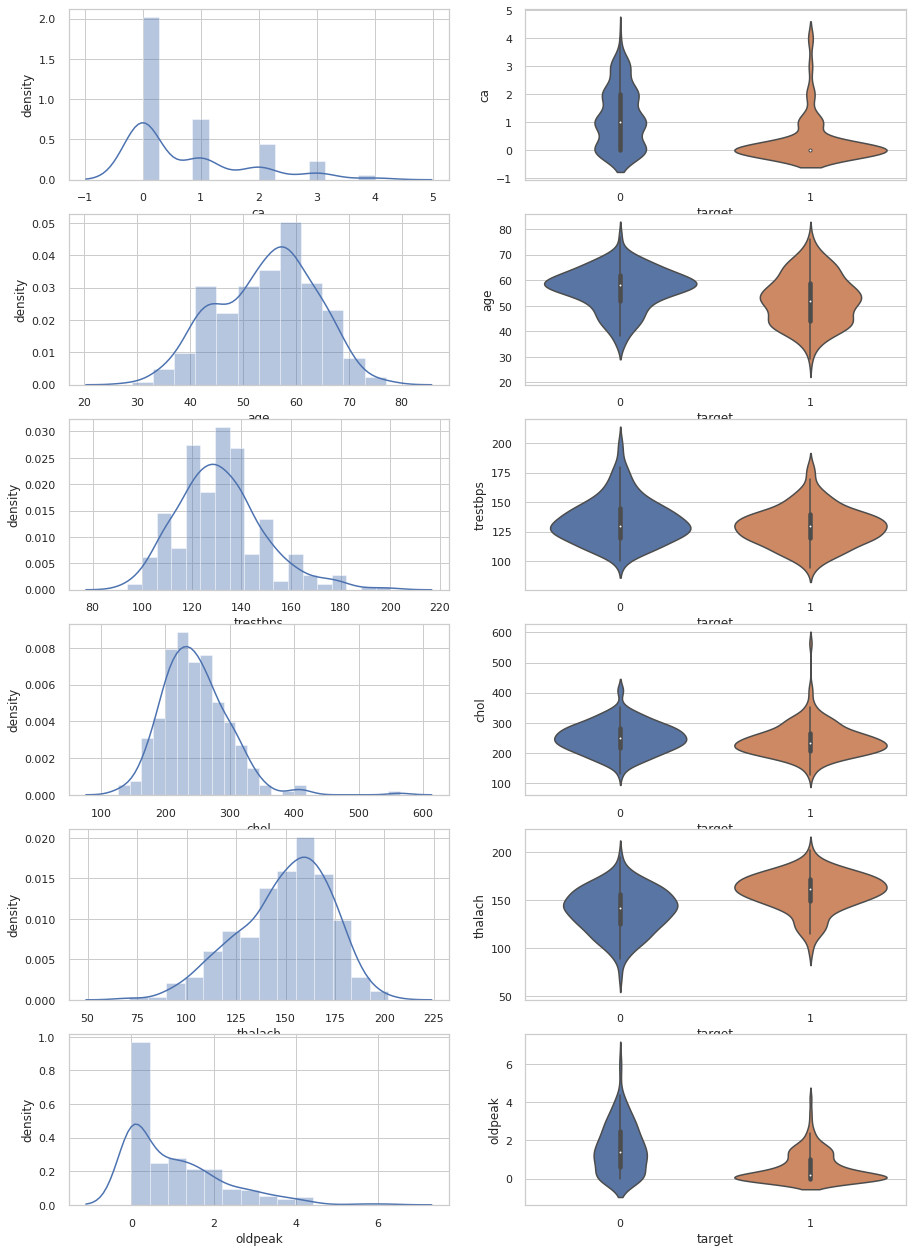

In [63]:
numeric = columns_types['numeric']
fig_numeric, axes = plt.subplots(nrows=len(numeric), ncols=2, figsize=(15, 22))
plotGrid(isCategorial=False)
numeric

['cp', 'restecg', 'slope', 'thal', 'sex', 'fbs', 'exang']

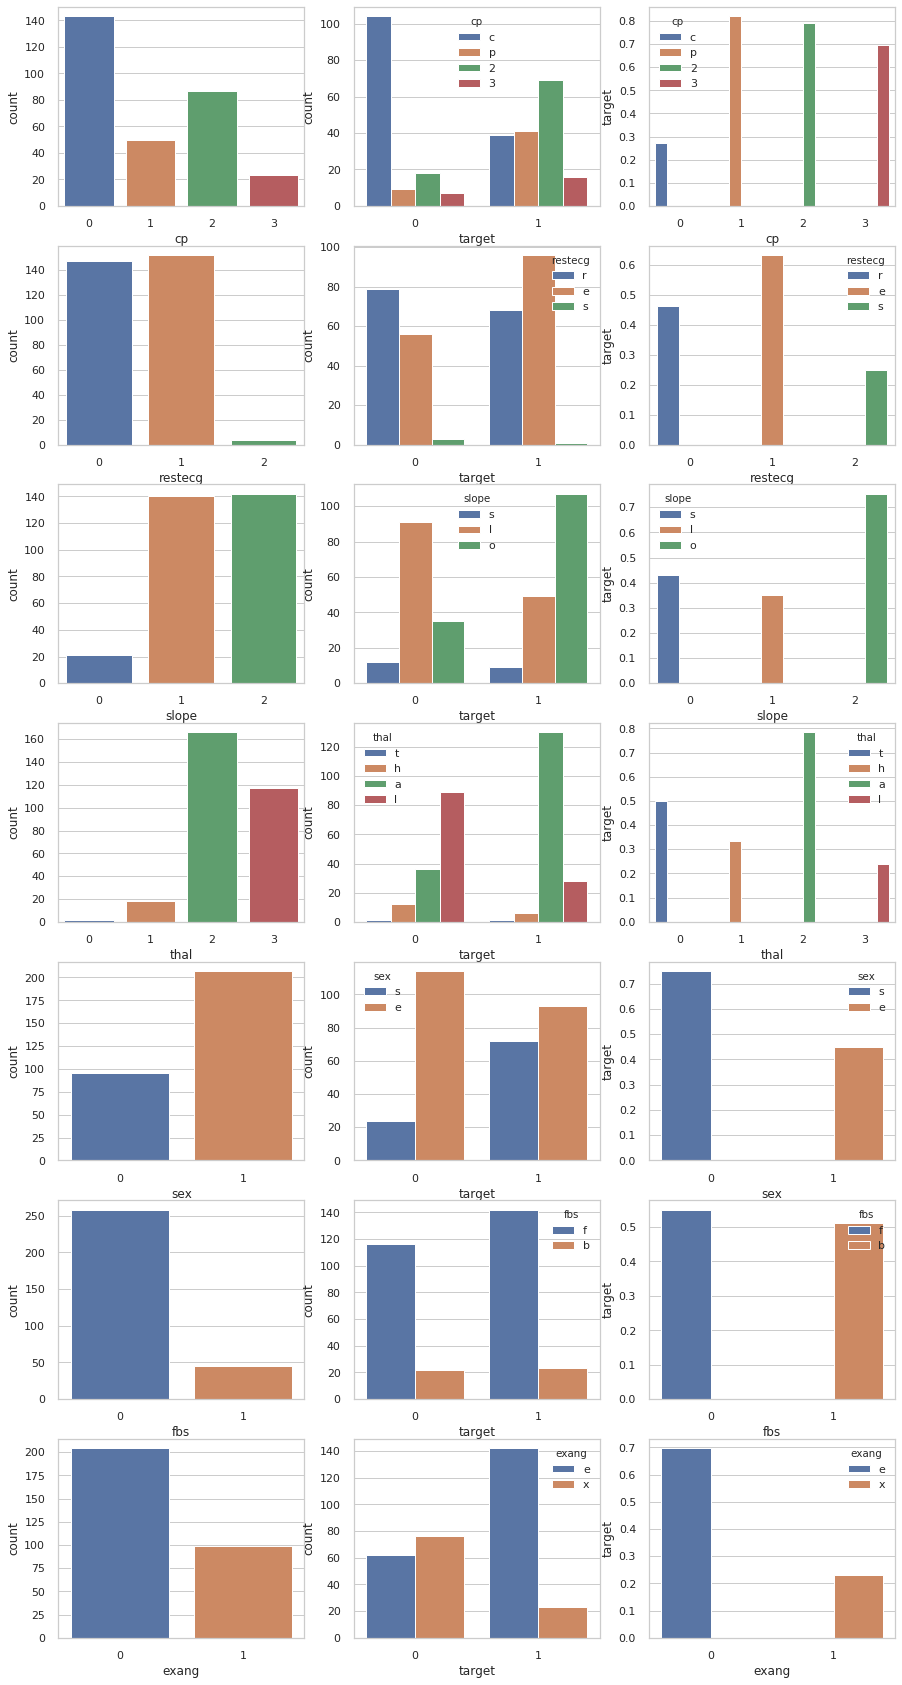

In [64]:
categorical = columns_types['categorical'] + columns_types['boolean']
fig_categorial, axes = plt.subplots(nrows=len(categorical), ncols=3, figsize=(15, 30))
plotGrid(isCategorial=True)
categorical

In [29]:
random_state = 42
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import (
    StratifiedKFold, cross_val_score, GridSearchCV, train_test_split
)
scaler = MinMaxScaler()
# scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split( X, y ,
                                                    test_size=0.2, 
                                                    random_state=random_state, 
                                                    stratify = y)

In [30]:
X_train_n = X_train[numeric]
X_test_n = X_test[numeric]

In [31]:
scaler.fit(X_train_n) 
X_train_normed = pd.DataFrame(scaler.transform(X_train_n))
X_test_normed = pd.DataFrame(scaler.transform(X_test_n))
X_train_normed.head()

,0,1,2,3,4,5
0,0.25,0.65,0.08,0.44,0.68,0.00
1,0.00,0.56,0.34,0.36,0.24,0.26
2,0.25,0.52,0.15,0.18,0.28,0.00
3,0.00,0.12,0.30,0.36,0.65,0.00
4,0.00,0.21,0.00,0.17,0.82,0.00


In [32]:
df_train_n = (X_train_n-np.min(X_train_n)) / (np.max(X_train_n)-np.min(X_train_n)).values 
df_test_n = (X_test_n-np.min(X_train_n)) / (np.max(X_train_n)-np.min(X_train_n)).values
df_train_n.head()

,ca,age,trestbps,chol,thalach,oldpeak
35,0.25,0.65,0.08,0.44,0.68,0.00
173,0.00,0.56,0.34,0.36,0.24,0.26
270,0.25,0.52,0.15,0.18,0.28,0.00
268,0.00,0.12,0.30,0.36,0.65,0.00
117,0.00,0.21,0.00,0.17,0.82,0.00


In [33]:
frames_n = [df_train_n, df_test_n]
df_n = pd.concat(frames_n)._get_numeric_data()
df_n.shape

(303, 6)

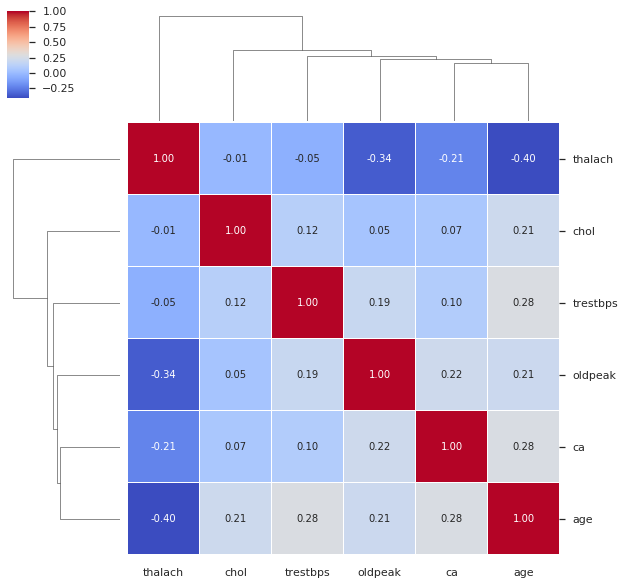

In [34]:
corrmat_n = df_n.corr(method='pearson')
# corrmat_c =df_n.corr(method='kendall')
# corrmat_n = df_n.corr(method='spearman')
# f, ax = plt.subplots(figsize=(12, 10))
# sns.heatmap(corrmat_n, ax=ax, cmap='coolwarm', linewidths=0.1, annot=True, fmt=".2f", square=True)

cg = sns.clustermap(corrmat_n, cmap='coolwarm', linewidths=0.1, annot=True, fmt=".2f", square=True);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

In [35]:
import scipy.stats as ss

In [36]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta

In [37]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [38]:
def convert(data, to):
    converted = None
    if to == 'array':
        if isinstance(data, np.ndarray):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
    else:
        raise ValueError(f'Unknown data conversion: {to}')
    if converted is None:
        raise TypeError(f'cannot handle data conversion of type: {type(data)} to {to}')
    else:
        return converted

In [39]:
def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [40]:

def associations(dataset, nominal_columns=None, mark_columns=False, theil_u=False, plot=True, return_results = False, **kwargs):
    dataset = convert(dataset, 'dataframe')
    columns = dataset.columns
    if nominal_columns is None:
        nominal_columns = list()
    elif nominal_columns == 'all':
        nominal_columns = columns
    corr = pd.DataFrame(index=columns, columns=columns)
    for i in range(0,len(columns)):
        for j in range(i,len(columns)):
            if i == j:
                corr[columns[i]][columns[j]] = 1.0
            else:
                if columns[i] in nominal_columns:
                    if columns[j] in nominal_columns:
                        if theil_u:
                            corr[columns[j]][columns[i]] = theils_u(dataset[columns[i]],dataset[columns[j]])
                            corr[columns[i]][columns[j]] = theils_u(dataset[columns[j]],dataset[columns[i]])
                        else:
                            cell = cramers_v(dataset[columns[i]],dataset[columns[j]])
                            corr[columns[i]][columns[j]] = cell
                            corr[columns[j]][columns[i]] = cell
                    else:
                        cell = correlation_ratio(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                else:
                    if columns[j] in nominal_columns:
                        cell = correlation_ratio(dataset[columns[j]], dataset[columns[i]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                    else:
                        cell, _ = ss.pearsonr(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
    corr.fillna(value=np.nan, inplace=True)
    if mark_columns:
        marked_columns = ['{} (nom)'.format(col) if col in nominal_columns else '{} (con)'.format(col) for col in columns]
        corr.columns = marked_columns
        corr.index = marked_columns
    if plot:
        plt.figure(figsize=(20,20))#kwargs.get('figsize',None))
        sns.heatmap(corr, annot=kwargs.get('annot',True), cmap='coolwarm',  fmt=kwargs.get('fmt','.2f'), square=False)
        cg = sns.clustermap(corr, annot=kwargs.get('annot',True), cmap='coolwarm', fmt=kwargs.get('fmt','.2f'), linewidths=0.1, square=True);
        plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
        cg
        
        plt.show()
    if return_results:
        return corr

In [41]:
df_n.head()

,ca,age,trestbps,chol,thalach,oldpeak
35,0.25,0.65,0.08,0.44,0.68,0.00
173,0.00,0.56,0.34,0.36,0.24,0.26
270,0.25,0.52,0.15,0.18,0.28,0.00
268,0.00,0.12,0.30,0.36,0.65,0.00
117,0.00,0.21,0.00,0.17,0.82,0.00


In [42]:
df[numeric].head()

,ca,age,trestbps,chol,thalach,oldpeak
0,2,69,140.0,239.0,151.0,1.8
1,3,66,160.0,246.0,120.0,0.0
2,1,55,128.0,205.0,130.0,2.0
3,1,57,110.0,335.0,143.0,3.0
4,1,71,110.0,265.0,130.0,0.0


In [43]:
X[numeric] = df_n

In [44]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.83,0,3,0.43,0.26,0,1,0.61,0,0.29,2,0.50,2
1,0.77,1,1,0.62,0.27,0,1,0.37,1,0.00,1,0.75,1
2,0.54,0,0,0.32,0.18,0,2,0.45,1,0.32,1,0.25,3
3,0.58,1,0,0.15,0.48,0,1,0.55,1,0.48,1,0.25,3
4,0.88,0,2,0.15,0.32,1,0,0.45,0,0.00,2,0.25,2


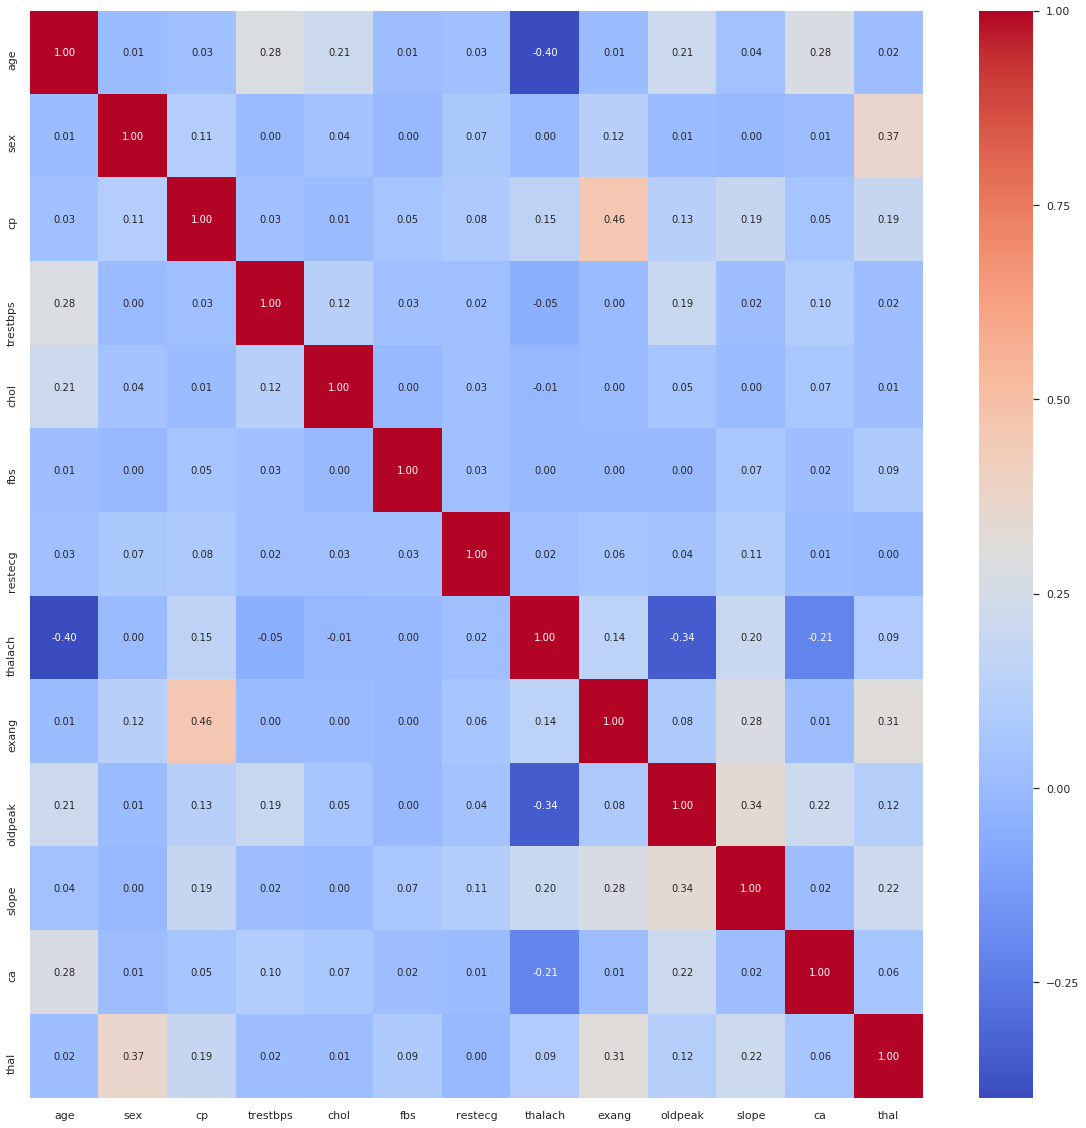

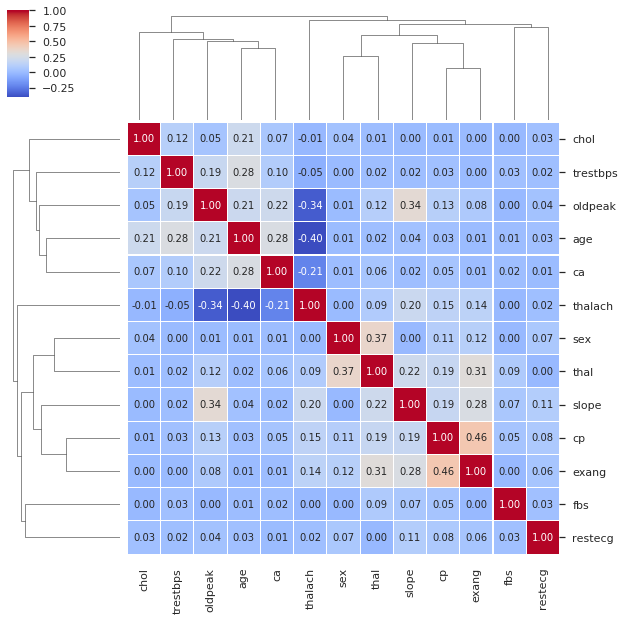

In [45]:
x_df = X.fillna(0)
results = associations(x_df, nominal_columns=categorical, return_results=True)